## Lesson 1

Things previously thought impossible a mere 7 years ago are now being done with ease through Deep Learning.

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('lizard photos', max_images=1)
urls[0]

Searching for 'lizard photos'


'https://cdn.mos.cms.futurecdn.net/ByVfv3fey7RCxmjF9Sbg8Y.jpg'

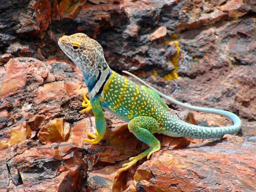

In [5]:
from fastdownload import download_url
dest = 'lizard.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'beach photos'


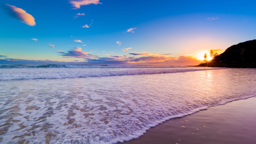

In [6]:
download_url(search_images('beach photos', max_images=1)[0], 'beach.jpg', show_progress=False)
Image.open('beach.jpg').to_thumb(256,256)

In [7]:
# searches = 'beach','lizard'
path = Path('lizard_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} night photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

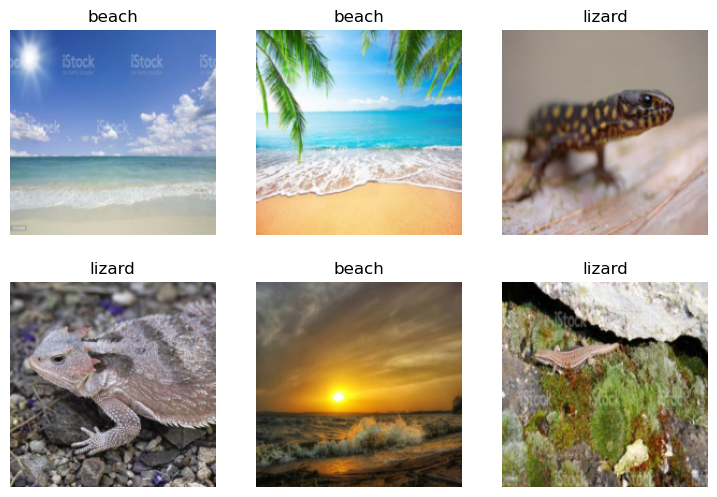

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.411958,0.000160,0.000000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.009941,0.001252,0.000000,00:03
1,0.007221,0.002547,0.000000,00:03
2,0.008559,0.000026,0.000000,00:03


In [11]:
is_lizard,_,probs = learn.predict(PILImage.create('lizard.jpg'))
print(f"This is a: {is_lizard}.")
print(f"Probability it's a beach: {probs[0]:.4f}")

This is a: lizard.
Probability it's a beach: 0.0000
